In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
income = pd.read_csv('/content/Income Dataset (50k).csv' )
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm
income = pd.read_csv('/content/Income Dataset (50k).csv' )
income = income.dropna()
income = income.drop(['education', 'relationship', 'capital-gain', 'capital-loss', 'native-country', ], axis = 1)
enc = LabelEncoder()
work_enc = pd.get_dummies(income['workclass'])
work_enc.head()
income['workclass'].head()
mar_enc = pd.get_dummies(income['marital-status'])
mar_enc.head()
race_enc = pd.get_dummies(income['race'])
gen_enc = pd.get_dummies(income['gender'])
occ_enc = pd.get_dummies(income['occupation'])
income_feat  = ['age', 'educational-num','hours-per-week']



income.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,hours-per-week,income_>50K
0,67,Private,366425,16,Divorced,Exec-managerial,White,Male,60,1
1,17,Private,244602,8,Never-married,Other-service,White,Male,15,0
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,White,Male,40,1
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,White,Male,40,0
4,25,State-gov,149248,10,Never-married,Other-service,Black,Male,40,0


In [ ]:
X = income.loc[:, income_feat ].values
#X = income.loc[:, : -1 ].values
Y = income.loc[:, ['income_>50K']].values
#Y = income.loc[:, -1 ].values
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.2, random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print(prediction)


[0 1 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pre = accuracy_score(Y_test, prediction)
print(pre)


0.7828382027989197


In [ ]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = income.loc[:, income_feat ].values
#X = income.loc[:, : -1 ].values
Y = income.loc[:, ['income_>50K']].values
#Y = income.loc[:, -1 ].values
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
clf.fit(X_train, Y_train)
ypred = clf.predict(X_test)
score = accuracy_score(Y_test, prediction)
print (score)



0.7828382027989197


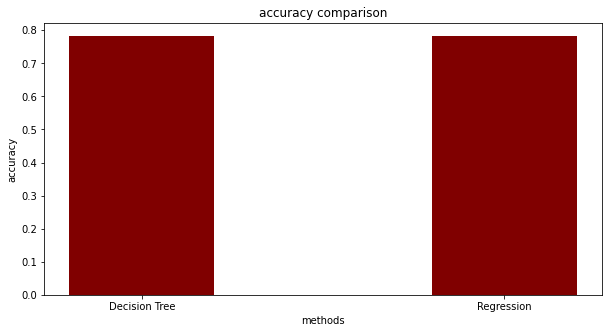

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
data = {'Decision Tree':score, 'Regression': pre}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("methods")
plt.ylabel("accuracy")
plt.title("accuracy comparison")
plt.show()